In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

#  导入数据

In [2]:
cs_training = pd.read_csv('data/cs-training.csv', index_col=0)
cs_training

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
149996,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149997,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149998,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149999,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


-     变量名称                          描述
- SeriousDlqin2yr                  __出现 90 天或更长时间的逾期行为（即定义好坏客户）
- RevolvingUtilizationOfUnsecuredLines    __贷款以及信用卡可用额度与总额度比例
- age                          __借款人借款年龄
- NumberOfTime30-59DaysPastDueNotWors    __过去两年内出现30-60天逾期但是没有发展的更坏的次数
- DebtRatio                     __每月偿还债务，赡养费，生活费用除以月总收入
- MonthlyIncome                     __月收入
- NumberOfOpenCreditLinesAndLoans       __开放式贷款和信贷数量
- NumberOfTimes90DaysLate             __借款者有90天或更高逾期的次数
- NumberRealEstateLoansOrLines          __抵押贷款和房地产贷款数量，包括房屋净值信贷额度
- NumberOfTime60-89DaysPastDueNotWorse     ____过去两年内出现60-90天逾期但是没有发展的更坏的次数
- NumberOfDependents                 __家庭中不包括自身的家属人数（配偶，子女等）


In [3]:
cs_training.SeriousDlqin2yrs.value_counts()

0    139974
1     10026
Name: SeriousDlqin2yrs, dtype: int64

- 0为信用好客户
- 1为信用坏客户

# 数据预处理

- 去重

In [4]:
cs_training.duplicated().sum()

609

In [5]:
cs_training.drop_duplicates(inplace=True)
cs_training.duplicated().sum()

0

- 处理缺失值

In [6]:
cs_training.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149391 entries, 1 to 150000
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      149391 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  149391 non-null  float64
 2   age                                   149391 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  149391 non-null  int64  
 4   DebtRatio                             149391 non-null  float64
 5   MonthlyIncome                         120170 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       149391 non-null  int64  
 7   NumberOfTimes90DaysLate               149391 non-null  int64  
 8   NumberRealEstateLoansOrLines          149391 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  149391 non-null  int64  
 10  NumberOfDependents                    145563 non-null  float64
dtype

In [7]:
import missingno 

<AxesSubplot:>

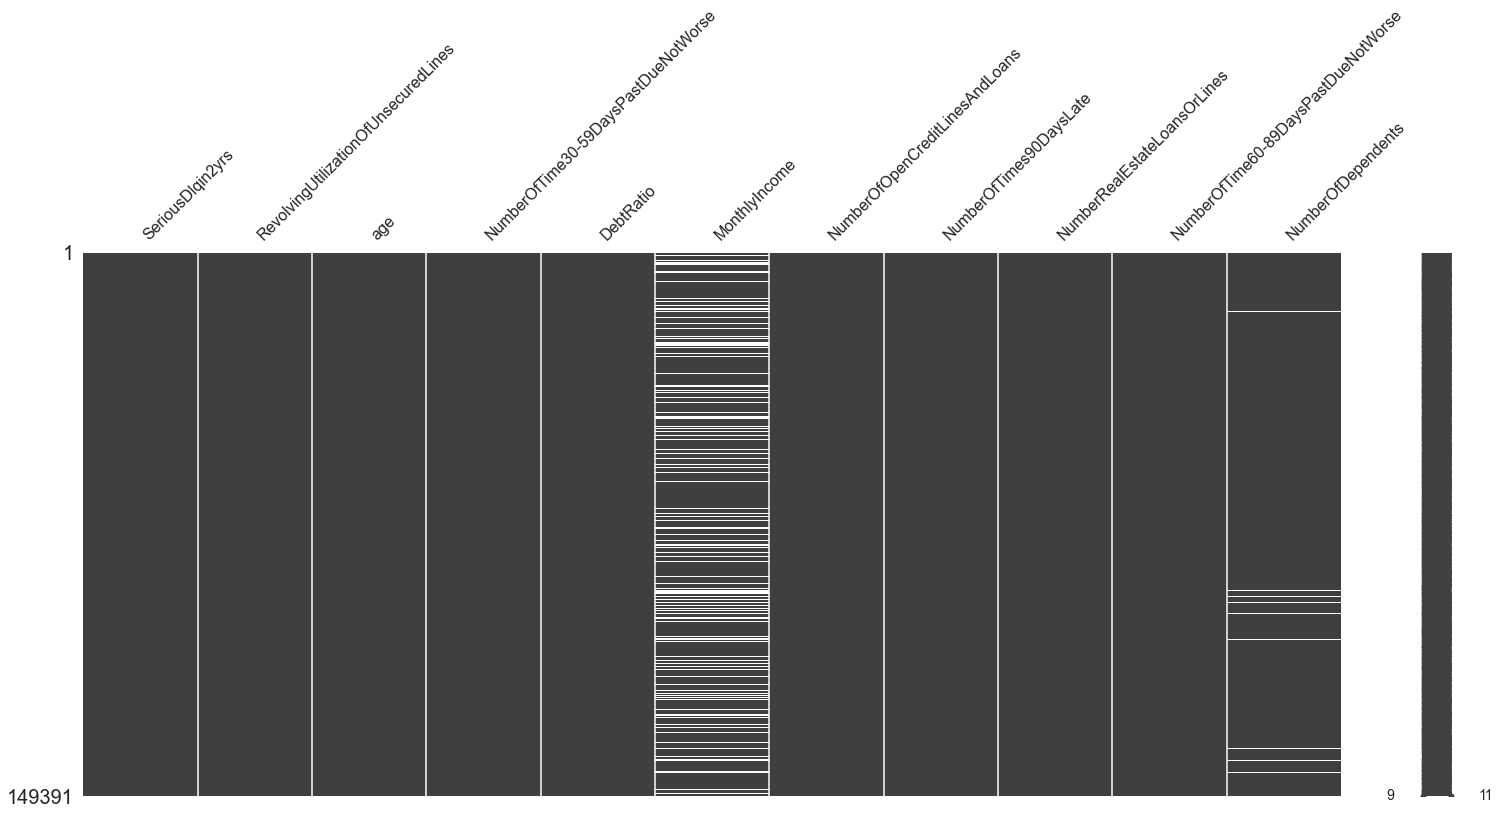

In [8]:
missingno.matrix(cs_training)

- MonthlyIncome 中存在大量的缺失值
- NumberOfDependents 中存在少量缺失值
- 其余数据中没有缺失值

In [9]:
cs_training.describe([.9,.99])

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,149391.000000,149391.000000,149391.000000,149391.000000,149391.000000,1.201700e+05,149391.000000,149391.000000,149391.000000,149391.000000,145563.000000
mean,0.066999,6.071087,52.306237,0.393886,354.436740,6.675098e+03,8.480892,0.238120,1.022391,0.212503,0.759863
std,0.250021,250.263672,14.725962,3.852953,2041.843455,1.438958e+04,5.136515,3.826165,1.130196,3.810523,1.116141
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154235,52.000000,0.000000,0.368234,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
90%,0.000000,0.978007,72.000000,1.000000,1275.000000,1.166600e+04,15.000000,0.000000,2.000000,0.000000,2.000000
99%,1.000000,1.093922,87.000000,4.000000,4985.100000,2.500000e+04,24.000000,3.000000,4.000000,2.000000,4.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [10]:
cs_training.MonthlyIncome.fillna(
    cs_training.MonthlyIncome.median(), inplace=True)

In [11]:
cs_training.NumberOfDependents.fillna(
    cs_training.NumberOfDependents.mode()[0], inplace=True)

<AxesSubplot:>

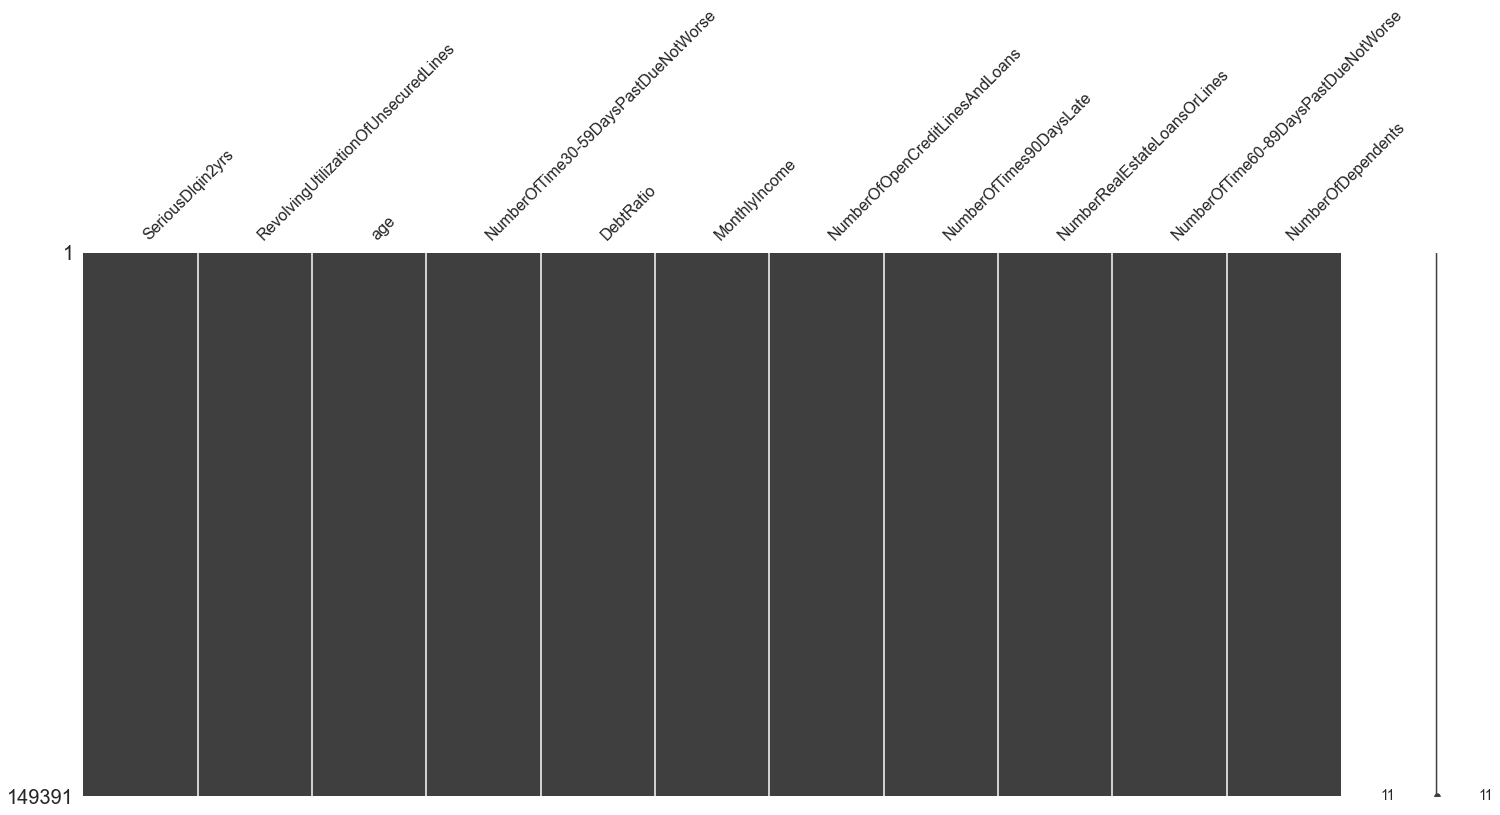

In [12]:
missingno.matrix(cs_training)

- 处理异常值 

-     变量名称                          描述
- SeriousDlqin2yr                  __出现 90 天或更长时间的逾期行为（即定义好坏客户）
- RevolvingUtilizationOfUnsecuredLines    __贷款以及信用卡可用额度与总额度比例
- age                          __借款人借款年龄
- NumberOfTime30-59DaysPastDueNotWors    __过去两年内出现30-60天逾期但是没有发展的更坏的次数
- DebtRatio                     __每月偿还债务，赡养费，生活费用除以月总收入
- MonthlyIncome                     __月收入
- NumberOfOpenCreditLinesAndLoans       __开放式贷款和信贷数量
- NumberOfTimes90DaysLate             __借款者有90天或更高逾期的次数
- NumberRealEstateLoansOrLines          __抵押贷款和房地产贷款数量，包括房屋净值信贷额度
- NumberOfTime60-89DaysPastDueNotWorse     ____过去两年内出现60-90天逾期但是没有发展的更坏的次数
- NumberOfDependents                 __家庭中不包括自身的家属人数（配偶，子女等）


In [13]:
cs_training = cs_training.loc[cs_training.age>0]

- 利用箱线图排查异常值

In [14]:
cs_training.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [15]:
boxplot_data =cs_training.iloc[:,1:].copy()
boxplot_data.head(1)

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0


<AxesSubplot:>

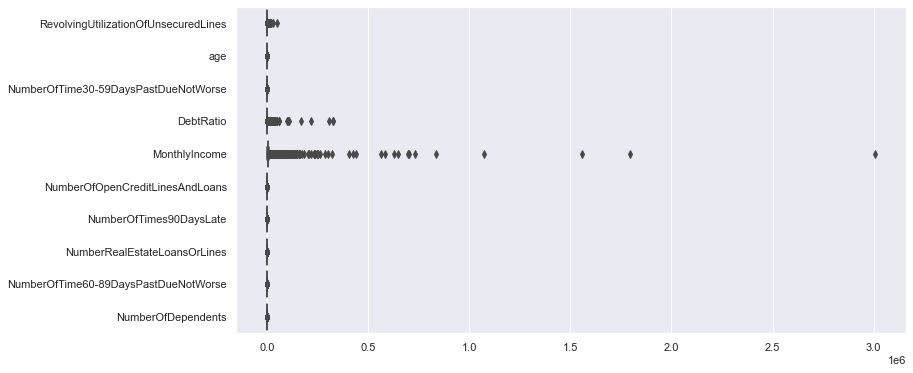

In [16]:
plt.figure(figsize=(12,6))
sns.boxplot(data=boxplot_data,orient='h')

- 由于个别数据最大值差距较大造成其他特征看不清，故将每个特征分开画图

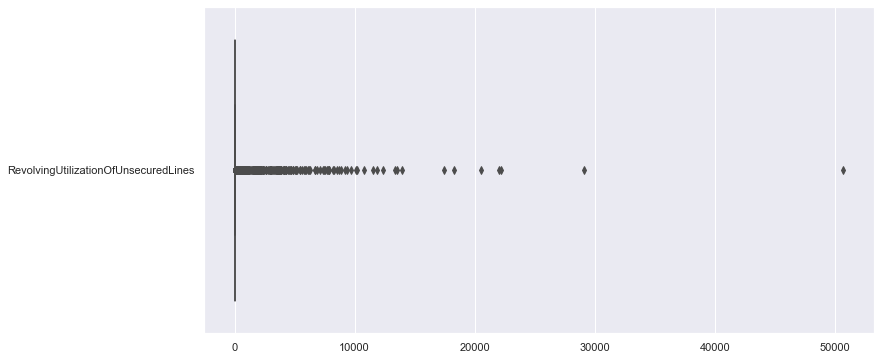

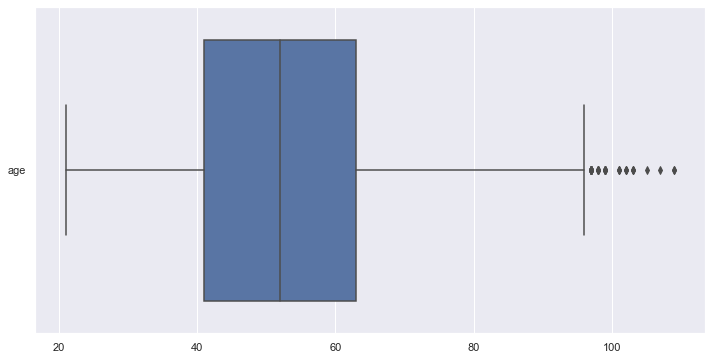

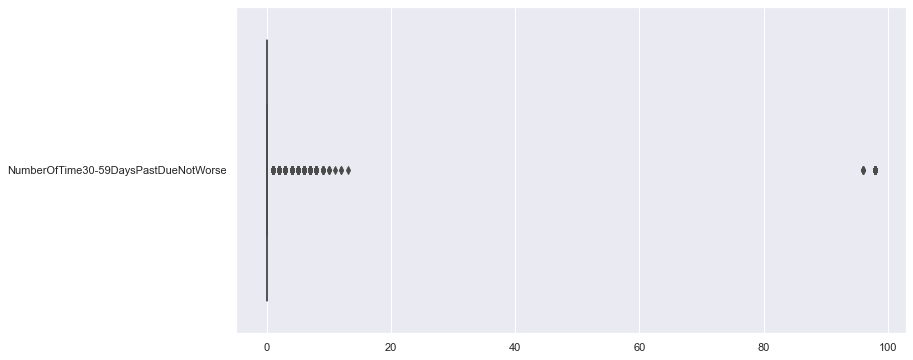

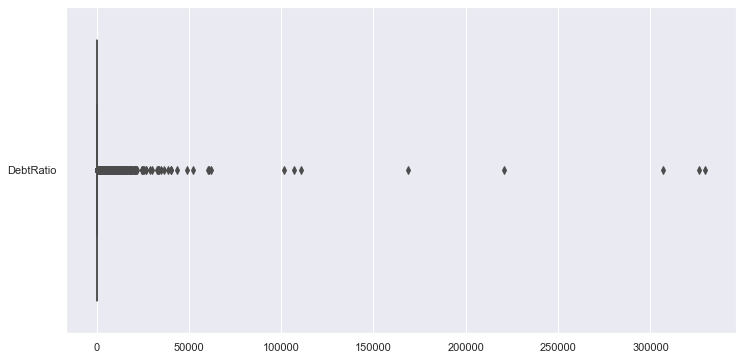

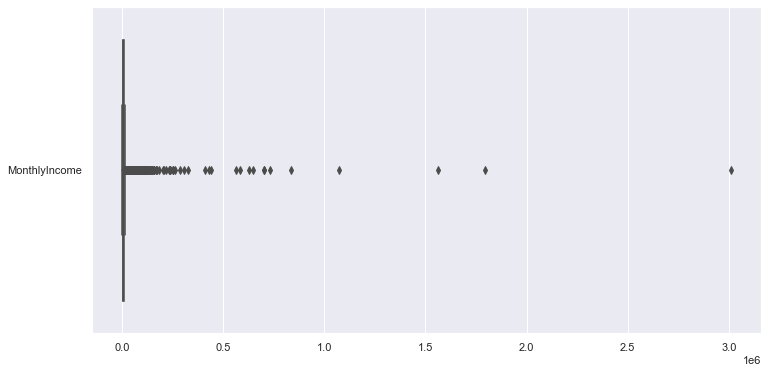

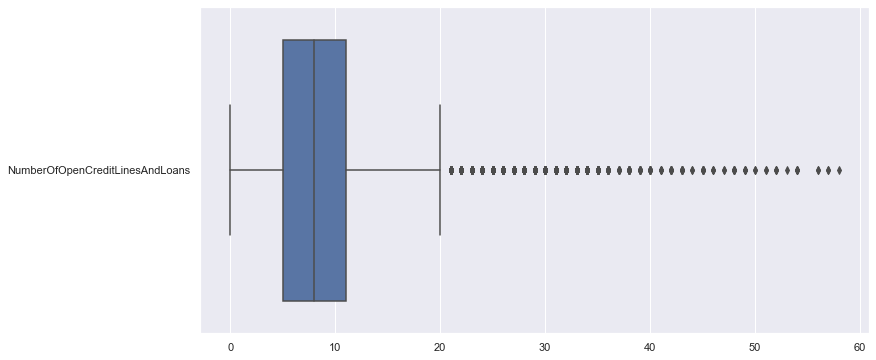

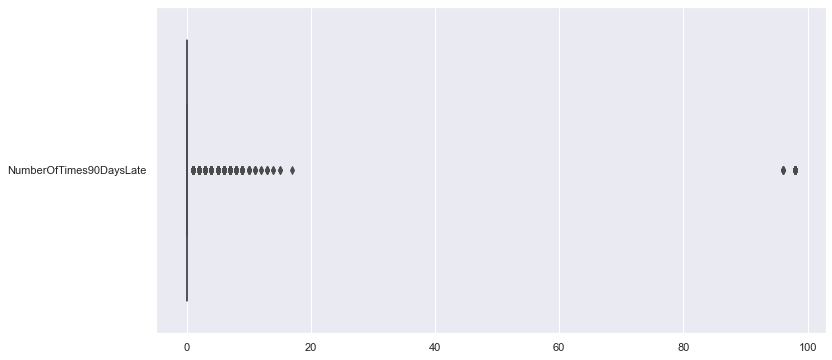

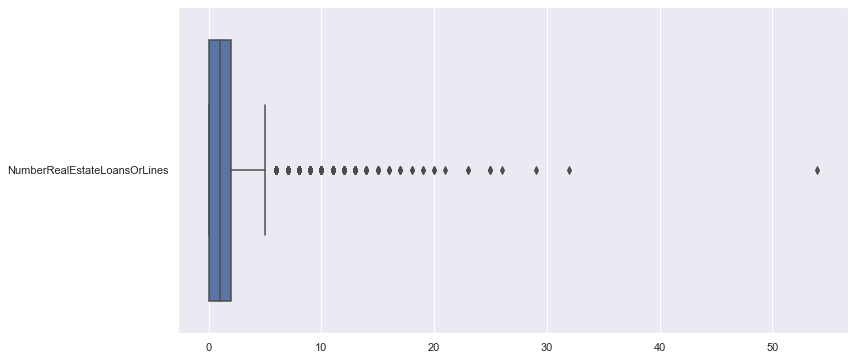

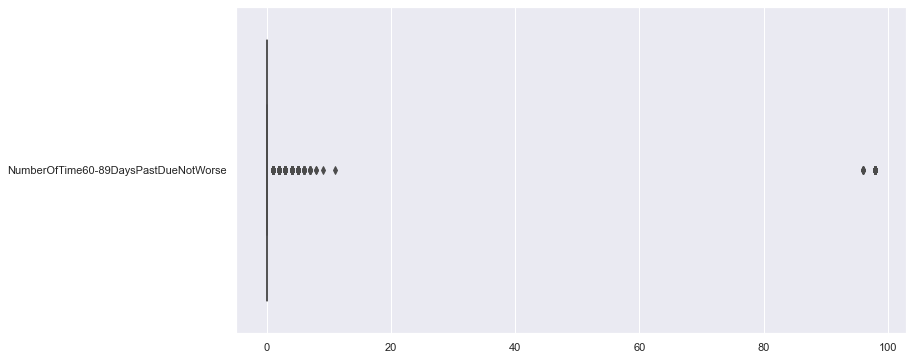

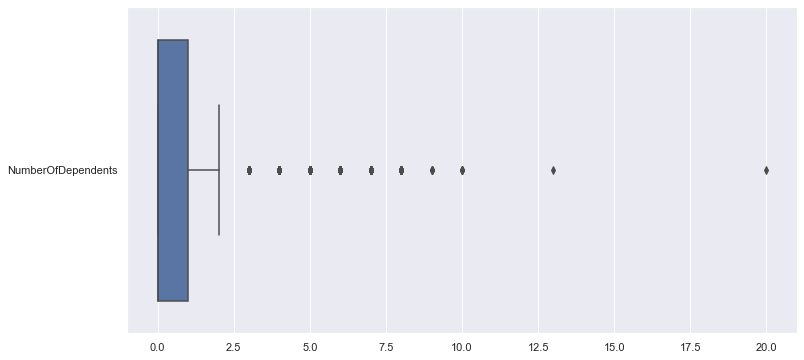

In [17]:
for col in boxplot_data.columns:
    data = boxplot_data[[col]]
    plt.figure(figsize=(12,6))
    sns.boxplot(data=data,orient='h')
    plt.show()

In [18]:
boxplot_data.describe([.75,.90,.99])

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,149390.000000,149390.000000,149390.000000,149390.000000,1.493900e+05,149390.000000,149390.000000,149390.000000,149390.000000,149390.000000
mean,6.071121,52.306587,0.393882,354.439110,6.425691e+03,8.480909,0.238122,1.022384,0.212504,0.740384
std,250.264509,14.725390,3.852966,2041.850084,1.291571e+04,5.136528,3.826177,1.130196,3.810536,1.108271
min,0.000000,21.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.154234,52.000000,0.000000,0.368233,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.556491,63.000000,0.000000,0.875294,7.400000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
90%,0.978007,72.000000,1.000000,1275.000000,1.078200e+04,15.000000,0.000000,2.000000,0.000000,2.000000
99%,1.093923,87.000000,4.000000,4985.110000,2.308410e+04,24.000000,3.000000,4.000000,2.000000,4.000000
max,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


- 设置阈值

In [19]:
threshold_dic = {
    "RevolvingUtilizationOfUnsecuredLines": 1,
    "age": 70,
    "NumberOfTime30-59DaysPastDueNotWors": 20,
    "DebtRatio": 5000,
    "MonthlyIncome": 300000,
    "NumberOfOpenCreditLinesAndLoans": 20,
    "NumberOfTimes90DaysLate": 20,
    "NumberRealEstateLoansOrLines": 5,
    "NumberOfTime60-89DaysPastDueNotWorse": 20,
    "NumberOfDependents": 5
}

In [20]:
threshold_series = pd.Series(threshold_dic)
threshold_series

RevolvingUtilizationOfUnsecuredLines         1
age                                         70
NumberOfTime30-59DaysPastDueNotWors         20
DebtRatio                                 5000
MonthlyIncome                           300000
NumberOfOpenCreditLinesAndLoans             20
NumberOfTimes90DaysLate                     20
NumberRealEstateLoansOrLines                 5
NumberOfTime60-89DaysPastDueNotWorse        20
NumberOfDependents                           5
dtype: int64

In [21]:
cs_training < threshold_series

C:\Users\Administrator\AppData\Local\Temp\ipykernel_9252\848160357.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  cs_training < threshold_series


,DebtRatio,MonthlyIncome,NumberOfDependents,NumberOfOpenCreditLinesAndLoans,NumberOfTime30-59DaysPastDueNotWors,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTime60-89DaysPastDueNotWorse,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,RevolvingUtilizationOfUnsecuredLines,SeriousDlqin2yrs,age
1,True,True,True,True,False,False,True,True,False,True,False,True
2,True,True,True,True,False,False,True,True,True,True,False,True
3,True,True,True,True,False,False,True,True,True,True,False,True
4,True,True,True,True,False,False,True,True,True,True,False,True
5,True,True,True,True,False,False,True,True,True,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
149996,True,True,True,True,False,False,True,True,True,True,False,False
149997,True,True,True,True,False,False,True,True,True,True,False,True
149998,True,True,True,True,False,False,True,True,True,True,False,True
149999,True,True,True,True,False,False,True,True,True,True,False,True


- 只要有一条特征不满足，就要删除这一行

In [22]:
cond = (cs_training > threshold_series).any(axis=1)
cond

C:\Users\Administrator\AppData\Local\Temp\ipykernel_9252\2393313694.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  cond = (cs_training > threshold_series).any(axis=1)


1          True
2         False
3         False
4         False
5         False
          ...  
149996     True
149997    False
149998    False
149999    False
150000    False
Length: 149390, dtype: bool

In [23]:
filter_stage = cs_training[~cond].copy()
filter_stage

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
8,0,0.754464,39,0,0.209940,3500.0,8,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
149995,0,0.385742,50,0,0.404293,3400.0,7,0,0,0,0.0
149997,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149998,0,0.246044,58,0,3870.000000,5400.0,18,0,1,0,0.0
149999,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


In [24]:
filter_stage.describe([.75,.9,.99])

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,123006.000000,123006.000000,123006.000000,123006.000000,123006.000000,123006.000000,123006.000000,123006.000000,123006.000000,123006.000000,123006.000000
mean,0.063493,0.323973,48.882510,0.240460,285.268979,6375.994846,8.096573,0.087353,1.011617,0.061469,0.807530
std,0.243848,0.342195,12.016866,0.677378,807.534281,5632.230076,4.344711,0.466794,0.962263,0.314885,1.118347
min,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.173212,49.000000,0.000000,0.365553,5400.000000,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.563969,59.000000,0.000000,0.773779,7500.000000,11.000000,0.000000,2.000000,0.000000,1.000000
90%,0.000000,0.951049,65.000000,1.000000,1207.000000,10900.000000,14.000000,0.000000,2.000000,0.000000,2.000000
99%,1.000000,1.000000,70.000000,3.000000,3929.950000,22799.950000,19.000000,2.000000,4.000000,1.000000,4.000000
max,1.000000,1.000000,70.000000,13.000000,5000.000000,287662.000000,20.000000,17.000000,5.000000,11.000000,5.000000


# 特征选择

- 对数据进行分箱

In [25]:
%run auto_bin.py

<Figure size 432x288 with 0 Axes>

In [26]:
filter_stage.head(1)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0


In [27]:
ab = AutoBins(filter_stage,'SeriousDlqin2yrs')
# 传入data和target

- 对所有列进行分箱，得到每个特征的最佳分组

In [28]:
for col in filter_stage.columns[1:]:
    ab.auto_bins(column=col)
    print('-'*100)

对 RevolvingUtilizationOfUnsecuredLines 列进行分箱: 
分组个数: 18 	iv值: 0.9534925073801521
分组个数: 17 	iv值: 0.9534326669200637
分组个数: 16 	iv值: 0.9532444195373395
分组个数: 15 	iv值: 0.9531061944640027
分组个数: 14 	iv值: 0.9528753654819975
分组个数: 13 	iv值: 0.9527138406892128
分组个数: 12 	iv值: 0.9518698243226711
分组个数: 11 	iv值: 0.9509097807775317
分组个数: 10 	iv值: 0.9494324425523772
分组个数: 09 	iv值: 0.9483789192674474
分组个数: 08 	iv值: 0.9470018510797893
分组个数: 07 	iv值: 0.9402946347568047
分组个数: 06 	iv值: 0.9272461504711821
分组个数: 05 	iv值: 0.9079283122888498
分组个数: 04 	iv值: 0.897599689900249
分组个数: 03 	iv值: 0.8216085457366221
分组个数: 02 	iv值: 0.7631660085674419

最后分箱情况: 
分组个数: 02 	iv值: 0.7631660085674419

分组woe情况：
        min       max  count_0  count_1  total  percentage  bad_rate       woe
0      -inf  0.457636    83728     2376  86104    0.699998  0.027595  0.870925
1  0.457636       inf    31468     5434  36902    0.300002  0.147255 -0.934934
-------------------------------------------------------------------------------------

- 如果iv值相差不大则取更少的分箱
- 综上我们可以确定特征分箱数

In [29]:
bins_num_dict = {
    "RevolvingUtilizationOfUnsecuredLines": 7,
    "age": 6,
    "NumberOfTime30-59DaysPastDueNotWorse": 2,
    "DebtRatio": 3,
    "MonthlyIncome": 3,
    "NumberOfOpenCreditLinesAndLoans": 4,
    "NumberOfTimes90DaysLate": 2,
    "NumberRealEstateLoansOrLines": 3,
    "NumberOfTime60-89DaysPastDueNotWorse": 2,
    "NumberOfDependents": 3
}

- 再使用最佳分组数对每个特征重新分箱

In [30]:
bins_dict = { }
woe_dict = { }
iv_dict = { }
for col in filter_stage.columns[ 1:]:
    num_bins, woe_df, iv = ab.auto_bins(column=col, n=bins_num_dict[col], show_iv=False)
    bins_dict[col] = num_bins
    woe_dict[col] = woe_df
    iv_dict[col] = iv
    

In [31]:
display(bins_dict) 
print("-"*100)
display(woe_dict) 
print("-"*100)
display(iv_dict) 
print("-"*100)

{'RevolvingUtilizationOfUnsecuredLines': [(-inf, 0.0, 8603, 285),
  (0.0, 0.130591838, 45662, 803),
  (0.130591838, 0.29162906, 17831, 620),
  (0.29162906, 0.4576356835000004, 11632, 668),
  (0.4576356835000004, 0.690803409, 11212, 1089),
  (0.690803409, 0.8292733265000003, 5319, 831),
  (0.8292733265000003, inf, 14937, 3514)],
 'age': [(-inf, 35.0, 18057, 1917),
  (35.0, 53.0, 51495, 4021),
  (53.0, 57.0, 12099, 698),
  (57.0, 63.0, 18388, 776),
  (63.0, 67.0, 9623, 292),
  (67.0, inf, 5534, 106)],
 'NumberOfTime30-59DaysPastDueNotWorse': [(-inf, 0.0, 99285, 4215),
  (0.0, inf, 15911, 3595)],
 'DebtRatio': [(-inf, 0.5201238545, 75304, 4650),
  (0.5201238545, 1207.0, 28131, 2627),
  (1207.0, inf, 11761, 533)],
 'MonthlyIncome': [(-inf, 5342.0, 45166, 4039),
  (5342.0, 9500.0, 52335, 3035),
  (9500.0, inf, 17695, 736)],
 'NumberOfOpenCreditLinesAndLoans': [(-inf, 2.0, 8811, 1336),
  (2.0, 3.0, 6707, 543),
  (3.0, 13.0, 85416, 4922),
  (13.0, inf, 14262, 1009)],
 'NumberOfTimes90DaysLate

----------------------------------------------------------------------------------------------------


{'RevolvingUtilizationOfUnsecuredLines':         min       max  count_0  count_1  total  percentage  bad_rate       woe
 0      -inf  0.000000     8603      285   8888    0.072257  0.032066  0.716147
 1  0.000000  0.130592    45662      803  46465    0.377746  0.017282  1.349437
 2  0.130592  0.291629    17831      620  18451    0.150001  0.033603  0.667744
 3  0.291629  0.457636    11632      668  12300    0.099995  0.054309  0.165997
 4  0.457636  0.690803    11212     1089  12301    0.100003  0.088529 -0.359505
 5  0.690803  0.829273     5319      831   6150    0.049998  0.135122 -0.834819
 6  0.829273       inf    14937     3514  18451    0.150001  0.190450 -1.244144,
 'age':     min   max  count_0  count_1  total  percentage  bad_rate       woe
 0  -inf  35.0    18057     1917  19974    0.162382  0.095975 -0.448458
 1  35.0  53.0    51495     4021  55516    0.451328  0.072430 -0.141276
 2  53.0  57.0    12099      698  12797    0.104036  0.054544  0.161429
 3  57.0  63.0    18388 

----------------------------------------------------------------------------------------------------


{'RevolvingUtilizationOfUnsecuredLines': 0.9402946347568047,
 'age': 0.16112645345612858,
 'NumberOfTime30-59DaysPastDueNotWorse': 0.538656058318565,
 'DebtRatio': 0.048593382060262584,
 'MonthlyIncome': 0.07390373856971542,
 'NumberOfOpenCreditLinesAndLoans': 0.09645057421568415,
 'NumberOfTimes90DaysLate': 0.7661090260542133,
 'NumberRealEstateLoansOrLines': 0.06384466848513391,
 'NumberOfTime60-89DaysPastDueNotWorse': 0.47722586818388424,
 'NumberOfDependents': 0.01901351511167288}

----------------------------------------------------------------------------------------------------


- 删除iv值低的特征值

<AxesSubplot:>

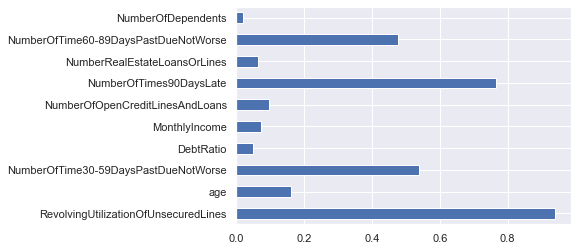

In [32]:
pd.Series(iv_dict).plot(kind='barh')

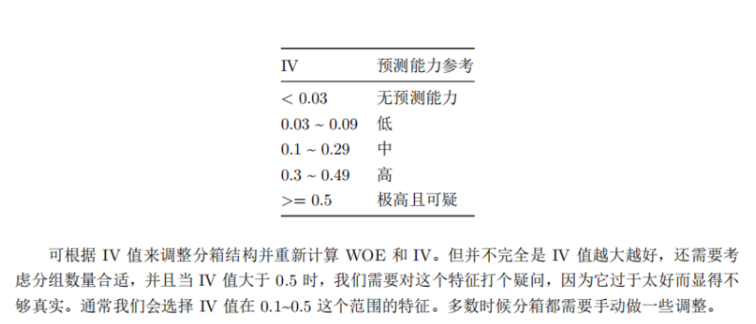

- 考虑只保留iv > 0.1的值 

In [33]:
cond = pd.Series(iv_dict) >= 0.1
feature_importances = pd.Series(iv_dict)[cond].index.tolist()
feature_importances

['RevolvingUtilizationOfUnsecuredLines',
 'age',
 'NumberOfTime30-59DaysPastDueNotWorse',
 'NumberOfTimes90DaysLate',
 'NumberOfTime60-89DaysPastDueNotWorse']

- 数据拆分

In [34]:
data = filter_stage.iloc[:,1:].copy()
target = filter_stage.SeriousDlqin2yrs.copy()

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
x_train,x_test,y_train,y_test = train_test_split(data,target,test_size=0.2)

In [37]:
x_train.shape,x_test.shape

((98404, 10), (24602, 10))

- 做特征重要性选择

In [38]:
x_train_iv = x_train[feature_importances].copy()
y_train_iv = y_train.copy()
x_test_iv = x_test[feature_importances].copy()
y_test_iv = y_test.copy()

In [39]:
x_train_iv.shape, y_train_iv.shape

((98404, 5), (98404,))

In [40]:
x_test_iv.shape, y_test_iv.shape

((24602, 5), (24602,))

# 算法建模
- LogisticRegression

In [86]:
%run Tools.py

<Figure size 432x288 with 0 Axes>

## 样本处理
- 正负样本不平衡

<AxesSubplot:xlabel='SeriousDlqin2yrs', ylabel='count'>

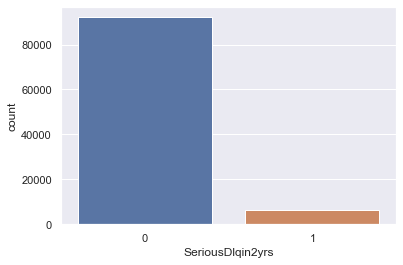

In [41]:
sns.countplot(x=y_train_iv)

- 使用smote进行过采样

In [42]:
from imblearn.over_sampling import SMOTE

In [43]:
smote = SMOTE()

In [44]:
x_train_sample,y_train_sample = smote.fit_resample(x_train_iv,y_train_iv)

In [46]:
x_train_sample.shape, y_train_sample.shape

((184296, 5), (184296,))

<AxesSubplot:xlabel='SeriousDlqin2yrs', ylabel='count'>

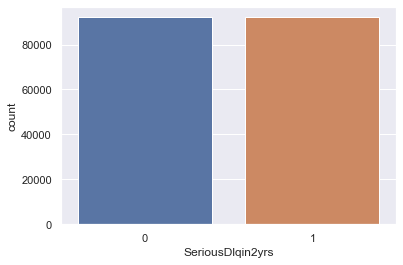

In [47]:
sns.countplot(x=y_train_sample)

- 检测并处理过采样后的数据

In [64]:
x_train_sample.isnull().any(axis=1).sum()

0

In [65]:
y_train_sample.isnull().any().sum()

0

- 无空值，重复值不做处理
- 使用LogisticRegression

In [66]:
from sklearn.linear_model import LogisticRegression

In [67]:
lr = LogisticRegression()
lr.fit(x_train_sample,y_train_sample)

LogisticRegression()

In [70]:
lr.score(x_train_sample, y_train_sample)

0.7566197855623562

In [71]:
lr.score(x_test_iv,y_test_iv)

0.7838793594016746

- 优化参数

In [72]:
from sklearn.model_selection import GridSearchCV

In [81]:
lr2 = LogisticRegression()
param_grid = {
    'C': [0.1, 0.5, 1, 5, 10],
    'solver': ['newton-cg','lbfgs','liblinear','sag','saga'],
    'max_iter': [50,100,500,1000,2000]
}
gv = GridSearchCV(lr2, param_grid, cv=5, n_jobs=-1)

In [88]:
ignore_warnings()

In [89]:
%time gv.fit(x_train_sample,y_train_sample)

CPU times: total: 3.08 s
Wall time: 2min 3s


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.1, 0.5, 1, 5, 10],
                         'max_iter': [50, 100, 500, 1000, 2000],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [90]:
best_lr_ = gv.best_estimator_

In [91]:
gv.best_params_

{'C': 0.5, 'max_iter': 50, 'solver': 'lbfgs'}

In [92]:
gv.best_score_

0.7566577609322217

- 与之前的分数相差不大

# 画图
-  recall召回率，precision精准率，F1值，accuracy准确率
- ROC曲线

In [95]:
from sklearn.metrics import auc, roc_curve, roc_auc_score, \
recall_score, precision_score, f1_score, accuracy_score

In [100]:
y_pred = best_lr_.predict(x_test_iv)
y_true = y_test_iv

In [106]:
recall_score(y_true, y_pred)

0.7252252252252253

In [107]:
precision_score(y_true, y_pred)

0.18708499335989376

- 设置不同的阈值

In [103]:
np.linspace(0.1,1,10)

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])